## Final Project Submission

Please fill out:
* Student name: Uma Palaniappan
* Student pace: Part Time 
* Scheduled project review date/time: June 24, 2019 
* Instructor name: Jeff Herman
* Blog post URL: https://umapalam.github.io/


### Introduction

The goal of this project is to build a regression that can predict housing prices. The data provids a list of houses located in King County and their attributes.  

### Import Libraries 

Importing all the libraries in one place keeps the code more organized. Libraries are used in order to load and analyze data and also to create visualizations.

In [1]:
# Import Libraries 
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

from matplotlib import style
style.use('ggplot')

### Loading King County Housing Data

In [2]:
# pandas DataFrame
df = pd.read_csv("kc_house_data.csv")

In [3]:
# .describe() function: Shows the characteristics of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# .head() function: Shows the first five rows of the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# .shape: Shows the dimensions of the data
df.shape

(21597, 21)

In [6]:
# .columns: Lists all the columns in the dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

To define some column names.
- id: The specific house 
- grade: A specific grade based on the quality of the house (categorical) 
- sqft_living15: Square feet of living room in 2015
- sqft_lot15: Square feet of lot in 2015

### Cleaning Data

In [7]:
# Check datatypes using .info() function
# Make sure the data is numerical 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The variables 'date' and 'sqft_basement' are objects. 

In [8]:
df.drop(['date'], axis=1).head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df['sqft_basement'].value_counts()[:5]

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [10]:
df['sqft_basement']= df['sqft_basement'].replace('?', np.nan)

In [11]:
df['sqft_basement'].isna()[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: sqft_basement, dtype: bool

In [12]:
df['sqft_basement'].dtype

dtype('O')

In [13]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [14]:
df['sqft_basement'].dtype

dtype('float64')

Replaced the '?' values with the null designation and have also converted the object type to a float. 

Check to see if there are null values in the data. If there are null values, either replace them or drop them. 

In [15]:
# Use the functions .isna().sum() to check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Variables that have null values:
- waterfront
- view
- sqft_basement
- yr_renovated

In [16]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.102144
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64


In [17]:
unique_values = df.nunique()
print(unique_values)

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64


In [18]:
df = df.drop('waterfront', axis = 1)

In [19]:
df = df.drop('yr_renovated', axis = 1)

In [20]:
# check to see if the two variables were dropped
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
view              63
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [21]:
mean_sqft = df.sqft_basement.mean()
df['sqft_basement'].fillna(mean_sqft, inplace=True)
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [22]:
df.loc[df.view.isna(), 'view'] = 0

Final check to see if all null values are gone. 

In [23]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Check for multicollinearity between the variables. Multicollinearity is where two or more variables (predictors) are closely related to each other in a regression model. This could lead to unreliable results in the data as a whole. 

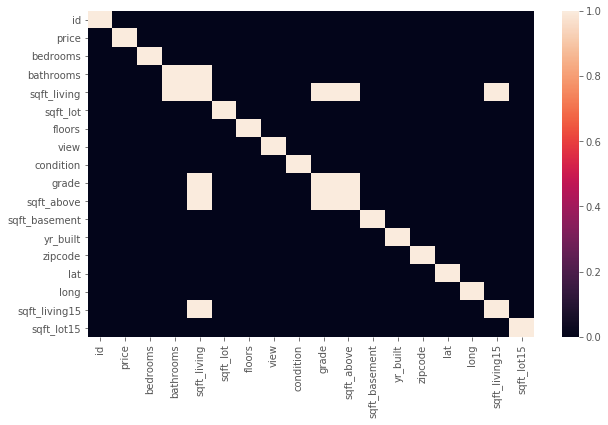

In [193]:
# Use a heatmap from seaborn 
plt.figure(figsize = (10,6))
sns.heatmap(abs(df.corr())>.75)

In [194]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,0.011772,-0.023803,0.008188,-0.010799,-0.004499,0.021617,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.393497,0.036056,0.667951,0.605368,0.322192,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.026496,0.356563,0.479386,0.299037,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,-0.126479,0.665838,0.686668,0.279541,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,-0.059445,0.762779,0.876448,0.430190,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,-0.008830,0.114731,0.184139,0.015293,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,-0.264075,0.458794,0.523989,-0.242359,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.045622,0.249082,0.166017,0.272313,-0.054452,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.045622,1.000000,-0.146896,-0.158904,0.169153,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.249082,-0.146896,1.000000,0.756073,0.166397,0.447865,-0.185771,0.113575,0.200341,0.713867,0.120981


In [195]:
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False


In general a correlation with an absolute value from '0.7' or higher is considered a high correlation. I have set the limit here to be '.75'. Based on this, the variables with high correlations are: 
- 'sqft_living' and 'bathrooms'
- 'grade' and 'sqft_living'
- 'sqft_above' and 'sqft_living'
- 'grade' and 'sqft_above'

### Exploring the Data

Focus Questions:
- Do larger basements sell more?
- What grade of house is sold at the highest price?
- Do larger living spaces sell at higher prices? 

The reasons why I am focusing on these questions are because I am curious to see if houses sell at higher prices. If more space in square feet entice people to buy a house. I want to see if the grade of a house can affect the price and what grade was the most commonly bought. I also am curious to see if more people buy houses in the summer months rather than the winter months.

In [24]:
df['sqft_basement'].value_counts().head()

0.000000      12826
291.851724      454
600.000000      217
500.000000      209
700.000000      208
Name: sqft_basement, dtype: int64

In [25]:
df['sqft_basement'].quantile(.33)

0.0

In [26]:
df['sqft_basement'].quantile(.66)

291.851723974838

In [27]:
my_list = []

for x in df['sqft_basement']:
    if x < df['sqft_basement'].quantile(.33):
        my_list.append('small')
    elif x >= (df['sqft_basement'].quantile(.33)) and (x < df['sqft_basement'].quantile(.66)):
        my_list.append('small')
    else:
         my_list.append('large')
            
df['sqft_basement_categories'] = my_list

In [28]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_categories
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,small
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,large
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,small
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,large
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,small


Text(0.5, 1.0, 'Size of Basement')

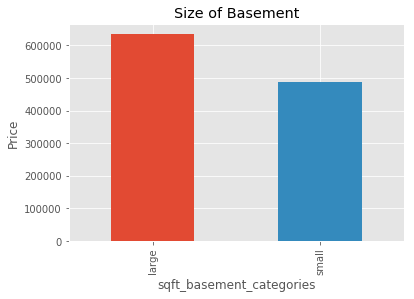

In [29]:
my_plot = df.groupby('sqft_basement_categories')['price'].mean().plot(kind = 'bar')
my_plot.set_ylabel('Price')
my_plot.set_title('Size of Basement')

In [30]:
df['sqft_basement'].mean()

291.85172397483797

Basements that are larger in square feet sold for more money compared to basements that were smaller. A lot of houses did not have basements at all as indicated by the value '0.0'.

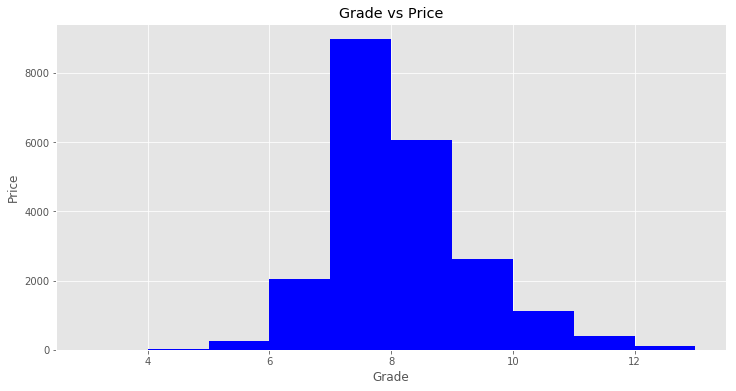

In [31]:
df['grade'].hist(figsize=(12,6), color= 'blue')
plt.title('Grade vs Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

The grade of house that is sold the most is grade '7'. This is interesting because I would think that grade '10' or higher would sell the most houses because it has been judged to be a higher quality. This variable will have to be dropped before doing the regression as it demonstrates a high correlation with other variables such as 'sqft_living'. 

In [32]:
df['sqft_living'].mean()

2080.3218502569803

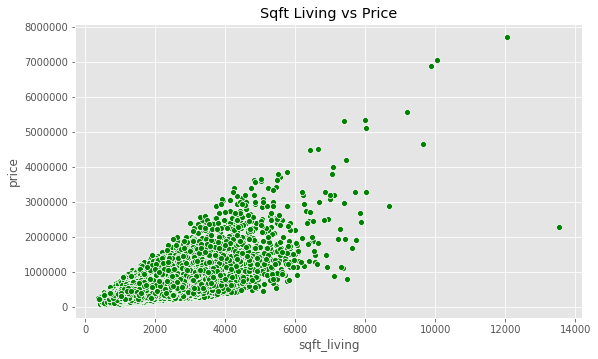

In [33]:
plt.figure(figsize=(20,20))

plt.subplot(321)
sns.scatterplot(df.sqft_living, df.price, color ='green')

plt.title('Sqft Living vs Price')

plt.subplots_adjust(hspace = 0.35)
plt.show()

There is a strong positive correlation shown in this visualization between price and sqft_living. There are some outliers in this graph. 

In [34]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'sqft_basement_categories'],
      dtype='object')

Drop any columns that have little impact on the data for the regression. 

In [89]:
df.drop(['id','date','condition','floors','sqft_basement','grade','sqft_above','view','sqft_living15','sqft_lot15','bathrooms','sqft_basement_categories','lat','long','zipcode','yr_built'], axis=1).head()



,price,bedrooms,sqft_living,sqft_lot
0,221900.0,3,1180,5650
1,538000.0,3,2570,7242
2,180000.0,2,770,10000
3,604000.0,4,1960,5000
4,510000.0,3,1680,8080


### Outiers in Data

An outlier is when one data point is extremely different from the other gathered data points. This could cause errors in data analysis because it could skew the data and obscure the true results. 

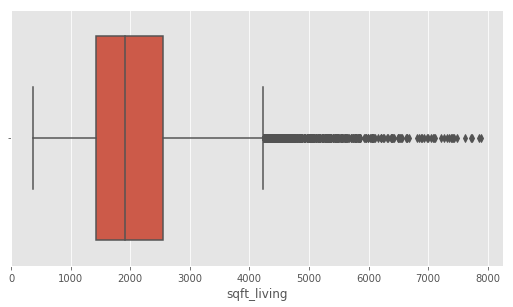

In [90]:
plt.figure(figsize=(30,16))
plt.subplot(331)
sns.boxplot(df.sqft_living)


In [91]:
print('Original dataset:',len(df))
df = df[df.sqft_living < 8000]
print('After removing outliers:',len(df))

Original dataset: 21587
After removing outliers: 21587


### Regression

In [92]:
#standardization 
logliv = np.log(df['sqft_living'])
loglot = np.log(df['sqft_lot'])

# minmax scaling
scaled_liv = (logliv-np.mean(logliv))/(max(logliv)-min(logliv))
scaled_lot = (loglot-np.mean(loglot))/(max(loglot)-min(loglot))

df_fin = pd.DataFrame([])
df_fin['liv']= scaled_liv
df_fin['lot']= scaled_lot
bed_dummies = pd.get_dummies(df['bedrooms'], prefix="bed")
price = df['price']

df_fin = pd.concat([price, df_fin, bed_dummies], axis=1)

In [93]:
df_ols = pd.concat([price, scaled_liv, scaled_lot], axis= 1)
df_ols.head(3)

,price,sqft_living,sqft_lot
0,221900.0,-0.155857,-0.043366
1,538000.0,0.098637,-0.012579
2,180000.0,-0.295425,0.027441


In [95]:
from statsmodels.formula.api import ols
outcome = 'price'
predictors = df_fin.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1156.
Date:                Thu, 27 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:39:58   Log-Likelihood:            -3.0063e+05
No. Observations:               21587   AIC:                         6.013e+05
Df Residuals:                   21573   BIC:                         6.014e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.106e+05   3.37e+04     15.168      0.000    4.45e+05    5.77e+05
liv         1.895e+06   1.83e+04    103.490      0.000    1.86e+06    1.93e+06
lot        -1.384e+05   1.74e+04     -7.933      0.000   -1.73e+05   -1.04e+05
bed_1       3.211e+05   3.85e+04      8.334      0.000    2.46e+05    3.97e+05
bed_2       1.845e+05   3.42e+04      5.395      0.000    1.17e+05    2.52e+05
bed_3       1.963e+04   3.38e+04      0.581      0.561   -4.66e+04    8.58e+04
bed_4      -2.557e+04   3.38e+04     -0.757      0.449   -9.18e+04    4.06e+04
bed_5       6589.1364   3.42e+04      0.192      0.847   -6.05e+04    7.37e+04
bed_6      -2.407e+04   3.69e+04     -0.652      0.515   -9.64e+04    4.83e+04
bed_7       2.675e+04    5.3e+04      0.505      0.614   -7.72e+04    1.31e+05
bed_8       1.959e+05   7.68e+04      2.551      0.011    4.54e+04    3.47e+05
bed_9      -4.198e+04   1.07e+05     -0.392      0.695   -2.52e+05    1.68e+05
bed_10     -9.422e+04   1.48e+05     -0.639      0.523   -3.83e+05    1.95e+05
bed_11     -2.816e+05   2.51e+05     -1.122      0.262   -7.74e+05     2.1e+05
bed_33      2.235e+05   2.51e+05      0.890      0.373   -2.69e+05    7.16e+05
==============================================================================
Omnibus:                    14249.024   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333420.955
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      21.406   Cond. No.                     1.51e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Train-Test Split and Cross Validation

In [96]:
X = df[['sqft_living','bedrooms','sqft_lot']]
y = df['price']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns =['Coefficient'])
coeff_df

,Coefficient
sqft_living,305.815434
bedrooms,-53242.202690
sqft_lot,-0.353330


In [99]:
y_pred = regressor.predict(X_test)

In [100]:
dfl = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfl.head()

,Actual,Predicted
701,195000.0,230544.704501
6933,800000.0,856838.633383
10651,415000.0,535703.454383
11217,395000.0,346431.626154
12888,770000.0,597132.477908


In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 168825.7497096462
Mean Squared Error: 60972170488.80156
Root Mean Squared Error: 246925.43507869245


In [102]:
def cross_validation(X, y, cv=15, show_scores=False):
    score = cross_val_score(regressor, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False

In [103]:
cross_validation(X, y, cv=15, show_scores= True)

Model Accuracy: 49.0 %
[0.48501113 0.49650569 0.50164949 0.42619134 0.51931113 0.4805947
 0.46588578 0.47049142 0.52427792 0.50845225 0.50720519 0.47546751
 0.49473029 0.49928429 0.52412897]


### Conclusion 

Initially the model was only 48% accurate across all the data so it was not a good model. Some mistakes were most likely made during the scaling process. The min-max scaling to be specific. I am pretty sure that the data cleaning went correctly. I attempted to improve the model and got a 1% increase in model accuracy. So it is currently 49% accurate. Size of the house was important but there might have been other features that could have improved this model, such as location. 